# 第４回課題

## 課題１

In [5]:
def digit_sum(n):
    return sum(int(digit) for digit in str(n))

def lucky_array(n):
    a = [False] * n

    for i in range(1, n):
        if i % 7 == 0 or digit_sum(i) % 7 == 0:
            a[i] = True

    return a

def print_lucky_numbers(n):
    # 出力を読みやすくすると
    lucky_numbers = []
    lucky_results = lucky_array(n)
    for i in range(1, len(lucky_results)):
        if lucky_results[i]:
            lucky_numbers.append(i)
    print("Lucky numbers", n, ":", lucky_numbers)

# テスト
print_lucky_numbers(66)


Lucky numbers 66 : [7, 14, 16, 21, 25, 28, 34, 35, 42, 43, 49, 52, 56, 59, 61, 63]


## 課題２

In [8]:
import math

def prime_array(n):
    if n <= 2:
        return [False] * n  # nが2以下の場合

    # 素数候補として初期化。最初は全てTrueとする。
    is_prime = [True] * n
    is_prime[0] = is_prime[1] = False  # 0と1は素数ではない

    # 2から√nまでの各数について篩を行う
    for start in range(2, math.isqrt(n) + 1):
        if is_prime[start]:  # startが素数の場合、その倍数を除外する
            for multiple in range(start*start, n, start):
                is_prime[multiple] = False

    return is_prime

def print_primes(n):
    is_prime = prime_array(n)
    primes = [i for i, prime in enumerate(is_prime) if prime]
    print(f"Primes {n}: {primes}")

# テスト
print_primes(30)


Primes 30: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


## 課題３

In [ ]:
>>> a = make2d(2,3) 
>>> a[0][0] = 1 
>>> a[[1, 0, 0], [0, 0, 0]]

>>> a = [[0]*3]*2 
>>> a[[0, 0, 0], [0, 0, 0]] # 一見，二次元配列 
>>> a[0][0] = 1
>>> a[[1, 0, 0], [1, 0, 0]] # 2 箇所変更されている

# 原因として、[0, 0, 0]を二重コピーしただけなので、a[0][0] = 1を変えると、コピーの方も変わる。

## 課題４

In [1]:
def extend_sum(a):
    rows = len(a)
    cols = len(a[0])
    # 行
    row_sums = [sum(row) for row in a]
    # 列
    col_sums = [sum(a[row][col] for row in range(rows)) for col in range(cols)]
    # 全体
    total_sum = sum(row_sums)
    # 新しい配列
    extended_a = []
    for i in range(rows):
        extended_a.append(a[i][:] + [row_sums[i]])

    extended_a.append(col_sums + [total_sum])
    
    return extended_a

# テスト
a = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

result = extend_sum(a)
for row in result:
    print(row)


[1, 2, 3, 6]
[4, 5, 6, 15]
[7, 8, 9, 24]
[12, 15, 18, 45]


## 課題５

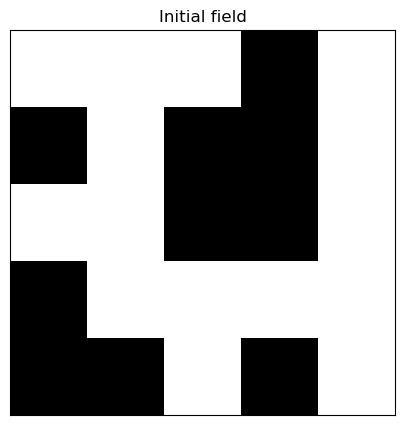

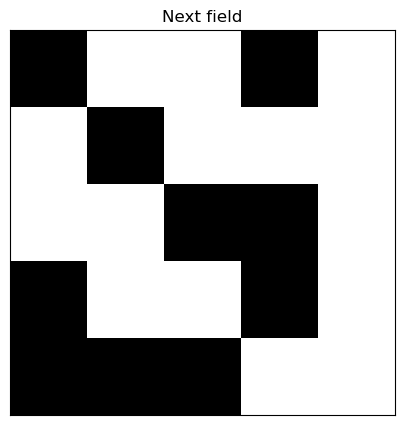

In [4]:
#　新しい生命周期を得るための関数
def update_board(board):
    # 形の獲得
    rows, cols = board.shape
    # 次の状態の保存用
    new_board = np.zeros((rows, cols), dtype=int)
    
    # 値を知る
    for i in range(rows):
        for j in range(cols):
            live_neighbors = (board[(i-1) % rows, (j-1) % cols] +
                              board[(i-1) % rows, j] +
                              board[(i-1) % rows, (j+1) % cols] +
                              board[i, (j-1) % cols] +
                              board[i, (j+1) % cols] +
                              board[(i+1) % rows, (j-1) % cols] +
                              board[(i+1) % rows, j] +
                              board[(i+1) % rows, (j+1) % cols])
            
            # 次の生死を決める
            if board[i, j] == 1:
                if live_neighbors < 2 or live_neighbors > 3:
                    new_board[i, j] = 0  # 死
                else:
                    new_board[i, j] = 1  # 生
            else:
                if live_neighbors == 3:
                    new_board[i, j] = 1  # 诞生、他は変わらないのだ
            
    return new_board

#　図を書く関数
def plot_board(board, title="life game"):
    cmap = ListedColormap(['white', 'black'])
    plt.figure(figsize=(5, 5))
    plt.imshow(board, cmap=cmap, aspect='equal')
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    plt.show()

# 初期化をランダム
initial_board = np.random.randint(0, 2, (5, 5))

# 次の状態
new_board = update_board(initial_board)

# 図を書く、文字配列でのOutputもできるがこの方がわかりやすいと思って。
plot_board(initial_board, "Initial field")
plot_board(new_board, "Next field")


## 課題６

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

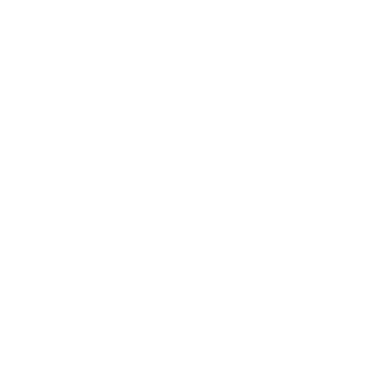

In [1]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#　新しい生命周期を得るための関数
def update_board(board):
    # 形の獲得
    rows, cols = board.shape
    # 次の状態の保存用
    new_board = np.zeros((rows, cols), dtype=int)
    
    # 値を知る
    for i in range(rows):
        for j in range(cols):
            live_neighbors = (board[(i-1) % rows, (j-1) % cols] +
                              board[(i-1) % rows, j] +
                              board[(i-1) % rows, (j+1) % cols] +
                              board[i, (j-1) % cols] +
                              board[i, (j+1) % cols] +
                              board[(i+1) % rows, (j-1) % cols] +
                              board[(i+1) % rows, j] +
                              board[(i+1) % rows, (j+1) % cols])
            
            # 次の生死を決める
            if board[i, j] == 1:
                if live_neighbors < 2 or live_neighbors > 3:
                    new_board[i, j] = 0  # 死
                else:
                    new_board[i, j] = 1  # 生
            else:
                if live_neighbors == 3:
                    new_board[i, j] = 1  # 诞生、他は変わらないのだ
            
    return new_board

#　図を書く関数
def plot_board(board, title="life game"):
    cmap = ListedColormap(['white', 'black'])
    plt.figure(figsize=(5, 5))
    plt.imshow(board, cmap=cmap, aspect='equal')
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    plt.show()

# 初期化をランダム
initial_board = np.random.randint(0, 2, (5, 5))

# 次の状態
new_board = update_board(initial_board)

def animate_and_save(steps, filepath):
    board = np.random.randint(0, 2, (5, 5))
    fig, ax = plt.subplots()
    cmap = ListedColormap(['white', 'black'])
    mat = ax.matshow(board, cmap=cmap)

    def update(frame):
        nonlocal board
        board = update_board(board)
        mat.set_data(board)
        return [mat]

    ani = animation.FuncAnimation(fig, update, frames=steps, blit=True, interval=500, repeat=False)
    plt.axis('off')
    ani.save(filepath, writer='ffmpeg', dpi=300)


file_path = "/Users/tei/Desktop/ProjectFile/Game_of_Life_Animation.mp4"
animate_and_save(10, file_path)


## 課題７